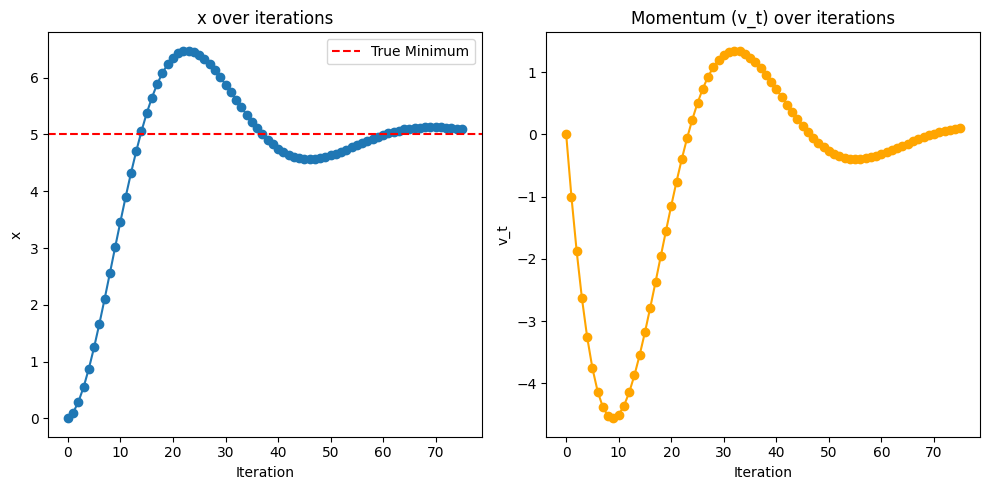

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and gradient
def F(x):
    return (x - 5)**2

def grad_F(x):
    return 2 * (x - 5)

# Initialize parameters
x = 0           # start far from optimum
v = 0               # initial momentum
eta = 0.1           # learning rate
beta = 0.9          # momentum coefficient
steps = 75

# Store for visualization
xs = [x]
velocities = [v]

# Momentum Gradient Descent
for t in range(steps):
    g = grad_F(x)
    v = beta * v + (1 - beta) * g    # momentum update
    x = x - eta * v          # parameter update


    xs.append(x)
    velocities.append(v)

# Plot
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(xs, marker='o')
plt.axhline(5, color='r', linestyle='--', label='True Minimum')
plt.title('x over iterations')
plt.xlabel('Iteration')
plt.ylabel('x')
plt.legend()

plt.subplot(1,2,2)
plt.plot(velocities, marker='o', color='orange')
plt.title('Momentum (v_t) over iterations')
plt.xlabel('Iteration')
plt.ylabel('v_t')

plt.tight_layout()
plt.show()


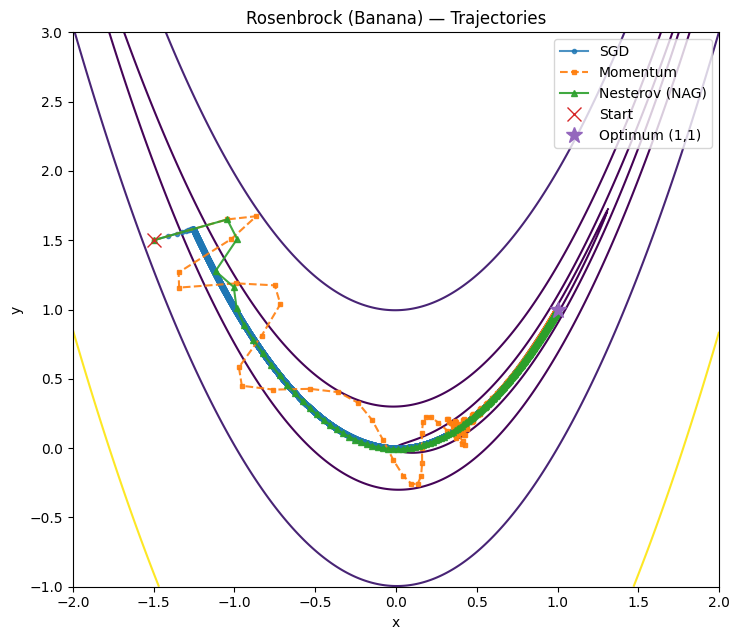

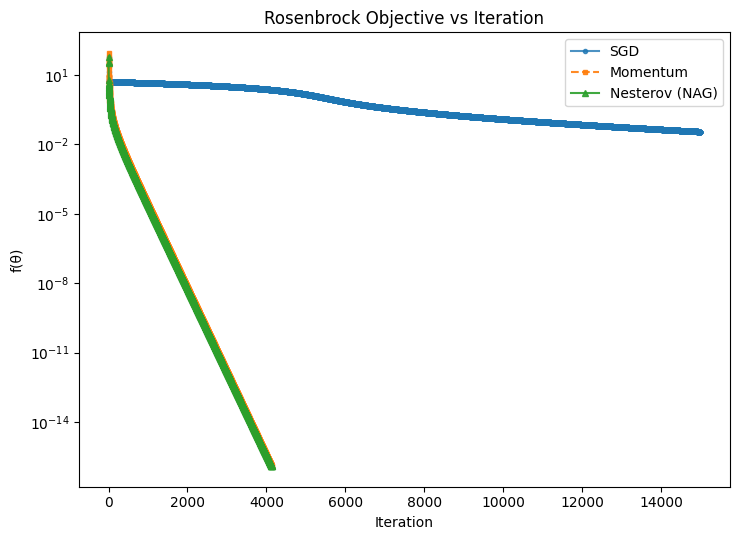

       SGD | iters=15001 | f_end=3.542e-02 | ||θ_end - (1,1)||=3.898e-01
  Momentum | iters= 4132 | f_end=1.248e-16 | ||θ_end - (1,1)||=2.500e-08
       NAG | iters= 4133 | f_end=1.259e-16 | ||θ_end - (1,1)||=2.511e-08


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Rosenbrock "banana" function
# =========================
def rosenbrock(theta, a=1.0, b=100.0):
    x, y = theta
    return (a - x)**2 + b*(y - x**2)**2

def rosenbrock_grad(theta, a=1.0, b=100.0):
    x, y = theta
    dfdx = -2*(a - x) - 4*b*x*(y - x**2)
    dfdy = 2*b*(y - x**2)
    return np.array([dfdx, dfdy])

# =========================
# Optimizers
# =========================
def sgd(grad_fn, theta0, lr=1e-3, max_iter=5000, tol=1e-8):
    theta = theta0.astype(float).copy()
    hist = [theta.copy()]
    vals = [rosenbrock(theta)]
    for _ in range(max_iter):
        g = grad_fn(theta)
        if np.linalg.norm(g) < tol:
            break
        theta = theta - lr * g
        hist.append(theta.copy())
        vals.append(rosenbrock(theta))
    return np.array(hist), np.array(vals)

def momentum(grad_fn, theta0, lr=1e-3, gamma=0.9, max_iter=5000, tol=1e-8):
    theta = theta0.astype(float).copy()
    v = np.zeros_like(theta)
    hist = [theta.copy()]
    vals = [rosenbrock(theta)]
    for _ in range(max_iter):
        g = grad_fn(theta)
        if np.linalg.norm(g) < tol:
            break
        v = gamma * v + lr * g      # velocity
        theta = theta - v
        hist.append(theta.copy())
        vals.append(rosenbrock(theta))
    return np.array(hist), np.array(vals)

def nesterov(grad_fn, theta0, lr=1e-3, gamma=0.9, max_iter=5000, tol=1e-8):
    theta = theta0.astype(float).copy()
    v = np.zeros_like(theta)
    hist = [theta.copy()]
    vals = [rosenbrock(theta)]
    for _ in range(max_iter):
        # look-ahead
        lookahead = theta - gamma * v
        g = grad_fn(lookahead)
        if np.linalg.norm(g) < tol:
            break
        v = gamma * v + lr * g
        theta = theta - v
        hist.append(theta.copy())
        vals.append(rosenbrock(theta))
    return np.array(hist), np.array(vals)

if __name__ == "__main__":
    # A challenging start inside the curved valley
    theta0 = np.array([-1.5, 1.5])

    # Tuned learning rates for Rosenbrock's anisotropic curvature
    # (SGD smaller; Momentum/NAG can use larger)
    H_sgd, V_sgd = sgd(rosenbrock_grad, theta0, lr=2e-4, max_iter=15000)
    H_mom, V_mom = momentum(rosenbrock_grad, theta0, lr=1e-3, gamma=0.9, max_iter=8000)
    H_nag, V_nag = nesterov(rosenbrock_grad, theta0, lr=1e-3, gamma=0.9, max_iter=8000)

    # ---------- Contour + trajectories ----------
    plt.figure(figsize=(7.5, 6.5))
    x = np.linspace(-2.0, 2.0, 600)
    y = np.linspace(-1.0, 3.0, 600)
    X, Y = np.meshgrid(x, y)
    Z = (1 - X)**2 + 100*(Y - X**2)**2

    # Use log-spaced levels to reveal valley structure
    levels = np.logspace(-1, 3, 5)
    plt.contour(X, Y, Z, levels=levels)


    plt.plot(H_sgd[:,0], H_sgd[:,1], 'o-', label='SGD', alpha=0.8, markersize=3)
    plt.plot(H_mom[:,0], H_mom[:,1], 's--', label='Momentum', alpha=0.9, markersize=3)
    plt.plot(H_nag[:,0], H_nag[:,1], '^-', label='Nesterov (NAG)', alpha=0.9, markersize=4)

    # Start and optimum
    plt.plot(theta0[0], theta0[1], 'x', markersize=10, label='Start')
    plt.plot(1.0, 1.0, '*', markersize=12, label='Optimum (1,1)')

    plt.title('Rosenbrock (Banana) — Trajectories')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(7.5, 5.5))
    it_sgd = np.arange(len(V_sgd))
    it_mom = np.arange(len(V_mom))
    it_nag = np.arange(len(V_nag))

    plt.semilogy(it_sgd, V_sgd, 'o-', label='SGD', alpha=0.8, markersize=3)
    plt.semilogy(it_mom, V_mom, 's--', label='Momentum', alpha=0.9, markersize=3)
    plt.semilogy(it_nag, V_nag, '^-', label='Nesterov (NAG)', alpha=0.9, markersize=4)

    plt.title('Rosenbrock Objective vs Iteration')
    plt.xlabel('Iteration')
    plt.ylabel('f(θ)')
    plt.legend()
    plt.tight_layout()
    plt.show()


    def summary(name, H, V):
        print(f"{name:>10s} | iters={len(V):5d} | f_end={V[-1]:.3e} | ||θ_end - (1,1)||={np.linalg.norm(H[-1]-np.array([1.,1.])):.3e}")
    summary("SGD", H_sgd, V_sgd)
    summary("Momentum", H_mom, V_mom)
    summary("NAG", H_nag, V_nag)


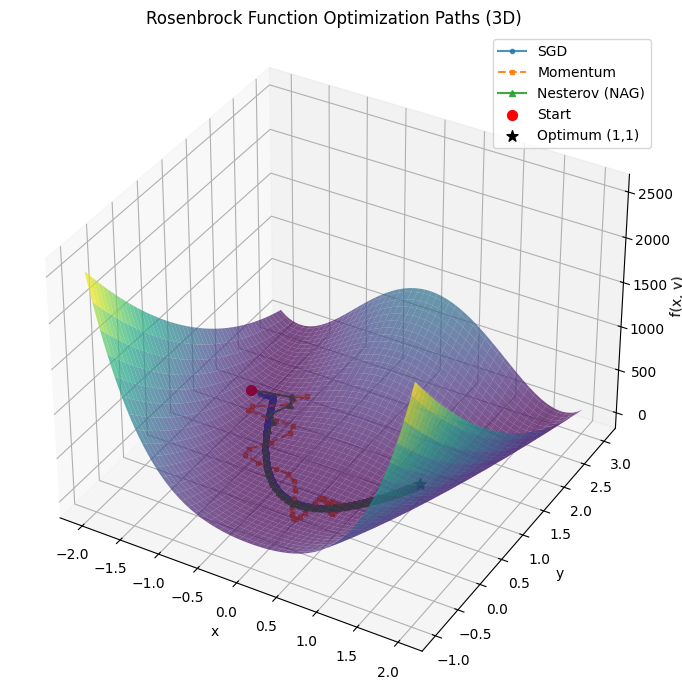

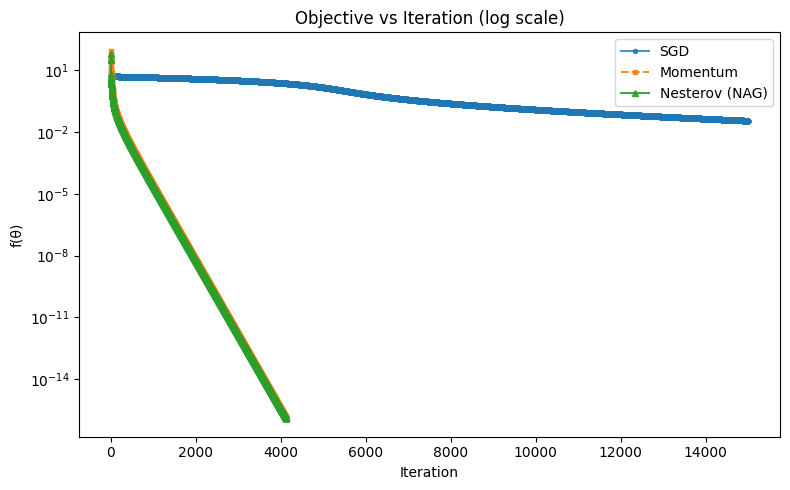

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# =========================
# Rosenbrock "banana" function
# =========================
def rosenbrock(theta, a=1.0, b=100.0):
    x, y = theta
    return (a - x)**2 + b*(y - x**2)**2

def rosenbrock_grad(theta, a=1.0, b=100.0):
    x, y = theta
    dfdx = -2*(a - x) - 4*b*x*(y - x**2)
    dfdy = 2*b*(y - x**2)
    return np.array([dfdx, dfdy])

# =========================
# Optimizers
# =========================
def sgd(grad_fn, theta0, lr=1e-3, max_iter=5000, tol=1e-8):
    theta = theta0.astype(float).copy()
    hist, vals = [theta.copy()], [rosenbrock(theta)]
    for _ in range(max_iter):
        g = grad_fn(theta)
        if np.linalg.norm(g) < tol:
            break
        theta -= lr * g
        hist.append(theta.copy())
        vals.append(rosenbrock(theta))
    return np.array(hist), np.array(vals)

def momentum(grad_fn, theta0, lr=1e-3, gamma=0.9, max_iter=5000, tol=1e-8):
    theta = theta0.astype(float).copy()
    v = np.zeros_like(theta)
    hist, vals = [theta.copy()], [rosenbrock(theta)]
    for _ in range(max_iter):
        g = grad_fn(theta)
        if np.linalg.norm(g) < tol:
            break
        v = gamma * v + lr * g
        theta -= v
        hist.append(theta.copy())
        vals.append(rosenbrock(theta))
    return np.array(hist), np.array(vals)

def nesterov(grad_fn, theta0, lr=1e-3, gamma=0.9, max_iter=5000, tol=1e-8):
    theta = theta0.astype(float).copy()
    v = np.zeros_like(theta)
    hist, vals = [theta.copy()], [rosenbrock(theta)]
    for _ in range(max_iter):
        lookahead = theta - gamma * v
        g = grad_fn(lookahead)
        if np.linalg.norm(g) < tol:
            break
        v = gamma * v + lr * g
        theta -= v
        hist.append(theta.copy())
        vals.append(rosenbrock(theta))
    return np.array(hist), np.array(vals)


theta0 = np.array([-1.5, 1.5])

H_sgd, V_sgd = sgd(rosenbrock_grad, theta0, lr=2e-4, max_iter=15000)
H_mom, V_mom = momentum(rosenbrock_grad, theta0, lr=1e-3, gamma=0.9, max_iter=8000)
H_nag, V_nag = nesterov(rosenbrock_grad, theta0, lr=1e-3, gamma=0.9, max_iter=8000)


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = (1 - X)**2 + 100 * (Y - X**2)**2

# Plot surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, linewidth=0, antialiased=True)

# Plot optimization paths
ax.plot(H_sgd[:,0], H_sgd[:,1], V_sgd, 'o-', label='SGD', alpha=0.8, markersize=3)
ax.plot(H_mom[:,0], H_mom[:,1], V_mom, 's--', label='Momentum', alpha=0.9, markersize=3)
ax.plot(H_nag[:,0], H_nag[:,1], V_nag, '^-', label='Nesterov (NAG)', alpha=0.9, markersize=4)

# Mark start and optimum
ax.scatter(theta0[0], theta0[1], rosenbrock(theta0), color='red', s=50, label='Start')
ax.scatter(1.0, 1.0, 0.0, color='black', s=70, marker='*', label='Optimum (1,1)')

# Labels and view
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Rosenbrock Function Optimization Paths (3D)')
ax.view_init(elev=35, azim=-60)
ax.legend()
plt.tight_layout()
plt.show()

# =========================
# Objective vs Iterations
# =========================
plt.figure(figsize=(8,5))
plt.semilogy(V_sgd, 'o-', label='SGD', alpha=0.8, markersize=3)
plt.semilogy(V_mom, 's--', label='Momentum', alpha=0.9, markersize=3)
plt.semilogy(V_nag, '^-', label='Nesterov (NAG)', alpha=0.9, markersize=4)
plt.xlabel('Iteration')
plt.ylabel('f(θ)')
plt.title('Objective vs Iteration (log scale)')
plt.legend()
plt.tight_layout()
plt.show()


#AdaGrad

In [ ]:
import numpy as np

def rosenbrock_grad(theta, a=1.0, b=100.0):
    x, y = theta
    dfdx = -2*(a - x) - 4*b*x*(y - x**2)
    dfdy =  2*b*(y - x**2)
    return np.array([dfdx, dfdy])

# Example:
theta = np.array([-5, 5])
g = rosenbrock_grad(theta)
print("Gradient:", g)

# Gradient squared (element-wise)
g_squared = g * g          # same as np.square(g)
print("Gradient squared:", g_squared)

# Accumulate over time
G = np.zeros_like(g)
for _ in range(5):
    g = rosenbrock_grad(theta)
    G += g * g
    print(" G : g ", G ,  " : ", g)
print("Accumulated squared gradients:", G)


Gradient: [-40012.  -4000.]
Gradient squared: [1.60096014e+09 1.60000000e+07]
 G : g  [1.60096014e+09 1.60000000e+07]  :  [-40012.  -4000.]
 G : g  [3.20192029e+09 3.20000000e+07]  :  [-40012.  -4000.]
 G : g  [4.80288043e+09 4.80000000e+07]  :  [-40012.  -4000.]
 G : g  [6.40384058e+09 6.40000000e+07]  :  [-40012.  -4000.]
 G : g  [8.00480072e+09 8.00000000e+07]  :  [-40012.  -4000.]
Accumulated squared gradients: [8.00480072e+09 8.00000000e+07]


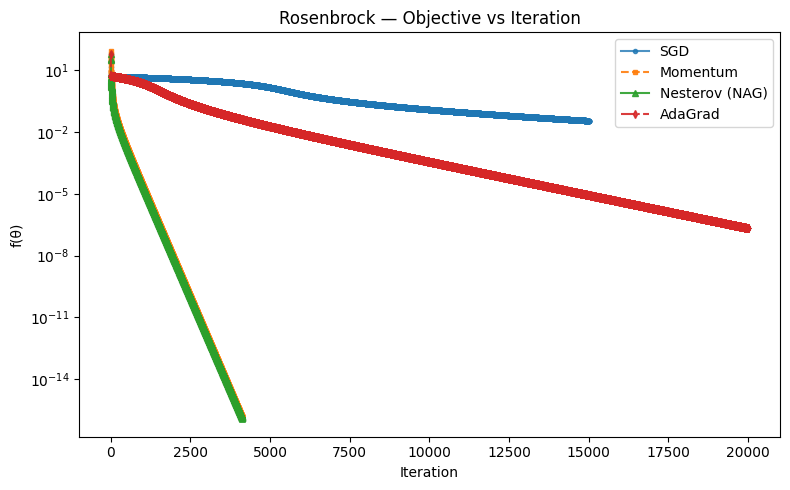

       SGD | iters=15001 | f_end=3.542e-02 | ||θ-(1,1)||=3.898e-01
  Momentum | iters= 4132 | f_end=1.248e-16 | ||θ-(1,1)||=2.500e-08
       NAG | iters= 4133 | f_end=1.259e-16 | ||θ-(1,1)||=2.511e-08
   AdaGrad | iters=20001 | f_end=2.138e-07 | ||θ-(1,1)||=1.034e-03


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- Rosenbrock ----------
def rosenbrock(theta, a=1.0, b=100.0):
    x, y = theta
    return (a - x)**2 + b*(y - x**2)**2

def rosenbrock_grad(theta, a=1.0, b=100.0):
    x, y = theta
    dfdx = -2*(a - x) - 4*b*x*(y - x**2)
    dfdy =  2*b*(y - x**2)
    return np.array([dfdx, dfdy])

# ---------- Optimizers ----------
def sgd(grad_fn, theta0, lr=2e-4, max_iter=15000, tol=1e-8):
    theta = theta0.astype(float).copy()
    hist, vals = [theta.copy()], [rosenbrock(theta)]
    for _ in range(max_iter):
        g = grad_fn(theta)
        if np.linalg.norm(g) < tol: break
        theta -= lr * g
        hist.append(theta.copy()); vals.append(rosenbrock(theta))
    return np.array(hist), np.array(vals)

def momentum(grad_fn, theta0, lr=1e-3, gamma=0.9, max_iter=8000, tol=1e-8):
    theta = theta0.astype(float).copy(); v = np.zeros_like(theta)
    hist, vals = [theta.copy()], [rosenbrock(theta)]
    for _ in range(max_iter):
        g = grad_fn(theta)
        if np.linalg.norm(g) < tol: break
        v = gamma * v + lr * g
        theta -= v
        hist.append(theta.copy()); vals.append(rosenbrock(theta))
    return np.array(hist), np.array(vals)

def nesterov(grad_fn, theta0, lr=1e-3, gamma=0.9, max_iter=8000, tol=1e-8):
    theta = theta0.astype(float).copy(); v = np.zeros_like(theta)
    hist, vals = [theta.copy()], [rosenbrock(theta)]
    for _ in range(max_iter):
        look = theta - gamma * v
        g = grad_fn(look)
        if np.linalg.norm(g) < tol: break
        v = gamma * v + lr * g
        theta -= v
        hist.append(theta.copy()); vals.append(rosenbrock(theta))
    return np.array(hist), np.array(vals)

# ---- AdaGrad (this is the adaptive gradient algorithm) ----
def adagrad(grad_fn, theta0, lr=0.2, eps=1e-8, max_iter=20000, tol=1e-8):
    """
    lr can be larger than SGD because each coord is scaled by 1/sqrt(G).
    For Rosenbrock, 0.1–0.3 often works; adjust if it plateaus/oscillates.
    """
    theta = theta0.astype(float).copy()
    G = np.zeros_like(theta)           # accumulator for squared grads
    hist, vals = [theta.copy()], [rosenbrock(theta)]
    for _ in range(max_iter):
        g = grad_fn(theta)
        if np.linalg.norm(g) < tol: break
        G += g * g
        step = (lr * g) / (np.sqrt(G) + eps)
        theta -= step
        hist.append(theta.copy()); vals.append(rosenbrock(theta))
    return np.array(hist), np.array(vals)

# ---------- Run & compare ----------
theta0 = np.array([-1.5, 1.5])
H_sgd,  V_sgd  = sgd(rosenbrock_grad, theta0)
H_mom,  V_mom  = momentum(rosenbrock_grad, theta0)
H_nag,  V_nag  = nesterov(rosenbrock_grad, theta0)
H_ada,  V_ada  = adagrad(rosenbrock_grad, theta0, lr=0.2)  # key line

# Objective vs iteration (log)
plt.figure(figsize=(8,5))
plt.semilogy(V_sgd, 'o-',  label='SGD', alpha=0.8, markersize=3)
plt.semilogy(V_mom, 's--', label='Momentum', alpha=0.9, markersize=3)
plt.semilogy(V_nag, '^-',  label='Nesterov (NAG)', alpha=0.9, markersize=4)
plt.semilogy(V_ada, 'd-.', label='AdaGrad', alpha=0.9, markersize=4)
plt.xlabel('Iteration'); plt.ylabel('f(θ)'); plt.title('Rosenbrock — Objective vs Iteration')
plt.legend(); plt.tight_layout(); plt.show()

# Quick summary
def summary(name, H, V):
    print(f"{name:>10s} | iters={len(V):5d} | f_end={V[-1]:.3e} | ||θ-(1,1)||={np.linalg.norm(H[-1]-np.array([1.,1.])):.3e}")
for n,(H,V) in [('SGD',(H_sgd,V_sgd)), ('Momentum',(H_mom,V_mom)), ('NAG',(H_nag,V_nag)), ('AdaGrad',(H_ada,V_ada))]:
    summary(n,H,V)


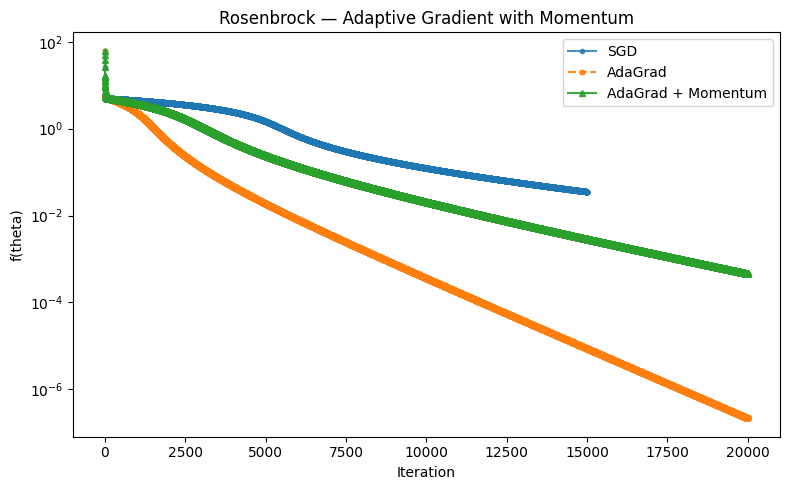

            SGD | iters=15001 | f_end=3.542e-02 | ||θ-(1,1)||=3.898e-01
        AdaGrad | iters=20001 | f_end=2.138e-07 | ||θ-(1,1)||=1.034e-03
AdaGrad+Momentum | iters=20001 | f_end=4.704e-04 | ||θ-(1,1)||=4.811e-02


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Rosenbrock -----
def rosenbrock(theta, a=1.0, b=100.0):
    x, y = theta
    return (a - x)**2 + b*(y - x**2)**2

def rosenbrock_grad(theta, a=1.0, b=100.0):
    x, y = theta
    dfdx = -2*(a - x) - 4*b*x*(y - x**2)
    dfdy =  2*b*(y - x**2)
    return np.array([dfdx, dfdy])

# ----- SGD -----
def sgd(grad_fn, theta0, lr=2e-4, max_iter=15000, tol=1e-8):
    theta = theta0.copy()
    hist, vals = [theta.copy()], [rosenbrock(theta)]
    for _ in range(max_iter):
        g = grad_fn(theta)
        if np.linalg.norm(g) < tol: break
        theta -= lr * g
        hist.append(theta.copy()); vals.append(rosenbrock(theta))
    return np.array(hist), np.array(vals)

# ----- AdaGrad -----
def adagrad(grad_fn, theta0, lr=0.2, eps=1e-8, max_iter=20000, tol=1e-8):
    theta = theta0.copy()
    G = np.zeros_like(theta)
    hist, vals = [theta.copy()], [rosenbrock(theta)]
    for _ in range(max_iter):
        g = grad_fn(theta)
        if np.linalg.norm(g) < tol: break
        G += g * g
        theta -= (lr * g) / (np.sqrt(G) + eps)
        hist.append(theta.copy()); vals.append(rosenbrock(theta))
    return np.array(hist), np.array(vals)

# ----- AdaGrad + Momentum -----
def adagrad_momentum(grad_fn, theta0, lr=0.2, beta=0.9, eps=1e-8, max_iter=20000, tol=1e-8):
    theta = theta0.copy()
    v = np.zeros_like(theta)    # momentum term
    G = np.zeros_like(theta)    # accumulator for squared grads
    hist, vals = [theta.copy()], [rosenbrock(theta)]
    for _ in range(max_iter):
        g = grad_fn(theta)
        if np.linalg.norm(g) < tol: break
        v = beta * v + (1 - beta) * g     # momentum smoothing
        G += g * g                        # adaptive accumulation
        theta -= (lr * v) / (np.sqrt(G) + eps)
        hist.append(theta.copy()); vals.append(rosenbrock(theta))
    return np.array(hist), np.array(vals)

# ----- Run & Compare -----
theta0 = np.array([-1.5, 1.5])

H_sgd,  V_sgd  = sgd(rosenbrock_grad, theta0)
H_ada,  V_ada  = adagrad(rosenbrock_grad, theta0)
H_amom, V_amom = adagrad_momentum(rosenbrock_grad, theta0)

# ----- Plot Objective vs Iteration -----
plt.figure(figsize=(8,5))
plt.semilogy(V_sgd, 'o-',  label='SGD', alpha=0.8, markersize=3)
plt.semilogy(V_ada, 's--', label='AdaGrad', alpha=0.9, markersize=3)
plt.semilogy(V_amom, '^-', label='AdaGrad + Momentum', alpha=0.9, markersize=4)
plt.xlabel('Iteration'); plt.ylabel('f(theta)')
plt.title('Rosenbrock — Adaptive Gradient with Momentum')
plt.legend(); plt.tight_layout(); plt.show()

# ----- Print quick summary -----
def summary(name, H, V):
    print(f"{name:>15s} | iters={len(V):5d} | f_end={V[-1]:.3e} | ||θ-(1,1)||={np.linalg.norm(H[-1]-np.array([1.,1.])):.3e}")
summary("SGD", H_sgd, V_sgd)
summary("AdaGrad", H_ada, V_ada)
summary("AdaGrad+Momentum", H_amom, V_amom)


#RMSprop

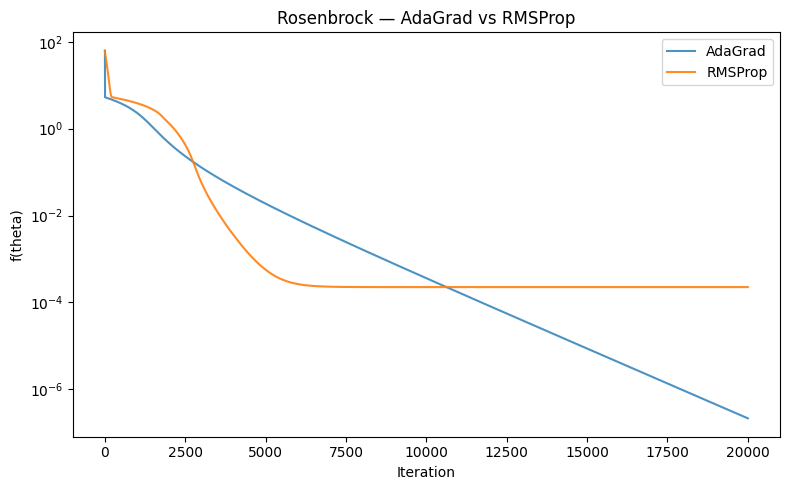

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rosenbrock function
def rosenbrock(theta, a=1.0, b=100.0):
    x, y = theta
    return (a - x)**2 + b*(y - x**2)**2

def rosenbrock_grad(theta, a=1.0, b=100.0):
    x, y = theta
    dfdx = -2*(a - x) - 4*b*x*(y - x**2)
    dfdy =  2*b*(y - x**2)
    return np.array([dfdx, dfdy])

# RMSProp optimizer
def rmsprop(grad_fn, theta0, lr=0.001, beta=0.9, eps=1e-8, max_iter=20000, tol=1e-8):
    theta = theta0.copy()
    Eg2 = np.zeros_like(theta)   # EMA of squared gradients
    hist, vals = [theta.copy()], [rosenbrock(theta)]

    for _ in range(max_iter):
        g = grad_fn(theta)
        if np.linalg.norm(g) < tol:
            break
        Eg2 = beta * Eg2 + (1 - beta) * (g * g)   # EMA update
        theta -= (lr * g) / (np.sqrt(Eg2) + eps)  # adaptive update
        hist.append(theta.copy())
        vals.append(rosenbrock(theta))
    return np.array(hist), np.array(vals)

# Compare AdaGrad vs RMSProp
def adagrad(grad_fn, theta0, lr=0.2, eps=1e-8, max_iter=20000):
    theta = theta0.copy()
    G = np.zeros_like(theta)
    hist, vals = [theta.copy()], [rosenbrock(theta)]
    for _ in range(max_iter):
        g = grad_fn(theta)
        G += g * g
        theta -= (lr * g) / (np.sqrt(G) + eps)
        hist.append(theta.copy()); vals.append(rosenbrock(theta))
    return np.array(hist), np.array(vals)

theta0 = np.array([-1.5, 1.5])
H_ada, V_ada = adagrad(rosenbrock_grad, theta0)
H_rms, V_rms = rmsprop(rosenbrock_grad, theta0, lr=0.001)

plt.figure(figsize=(8,5))
plt.semilogy(V_ada, label='AdaGrad', alpha=0.8)
plt.semilogy(V_rms, label='RMSProp', alpha=0.9)
plt.xlabel('Iteration'); plt.ylabel('f(theta)')
plt.title('Rosenbrock — AdaGrad vs RMSProp')
plt.legend(); plt.tight_layout(); plt.show()


#Simulated Annealing

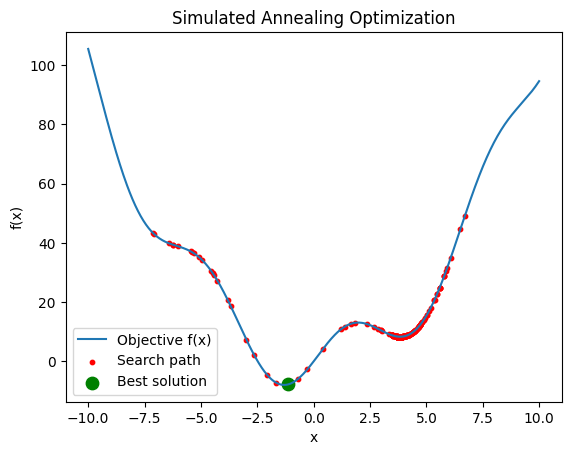

Best solution: x = -1.1407, f(x) = -7.7881


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function (
def f(x):
    return x**2 + 10 * np.sin(x)

# Simulated Annealing parameters
T = 1000          # initial temperature
T_min = 1e-3
alpha = 0.95      # cooling rate
x = np.random.uniform(-10, 10)  # random initial point
best_x = x
best_cost = f(x)

history = [x]

# SA main loop
while T > T_min:
    # generate new candidate near current x
    x_new = x + np.random.uniform(-1, 1)
    delta = f(x_new) - f(x)

    # accept new x if better, or with Boltzmann probability
    if delta < 0 or np.exp(-delta / T) > np.random.rand():
        x = x_new

    # track best solution
    if f(x) < best_cost:
        best_x = x
        best_cost = f(x)

    # record and cool down
    history.append(x)
    T *= alpha

# Plot optimization path
xs = np.linspace(-10, 10, 500)
plt.plot(xs, f(xs), label='Objective f(x)')
plt.scatter(history, [f(xi) for xi in history], c='red', s=10, label='Search path')
plt.scatter(best_x, best_cost, c='green', s=80, label='Best solution')
plt.title('Simulated Annealing Optimization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

print(f"Best solution: x = {best_x:.4f}, f(x) = {best_cost:.4f}")


=== Linear Cooling ===
Estimated steps (from schedule): 2000
Actual steps taken:             2000
Accepted moves:                 1822
Best Linear: x = -1.3091, f(x) = -7.945781

=== Geometric Cooling ===
Estimated steps (from schedule): 225
Actual steps taken:             225
Accepted moves:                 87
Best Geometric: x = -1.3082, f(x) = -7.945806


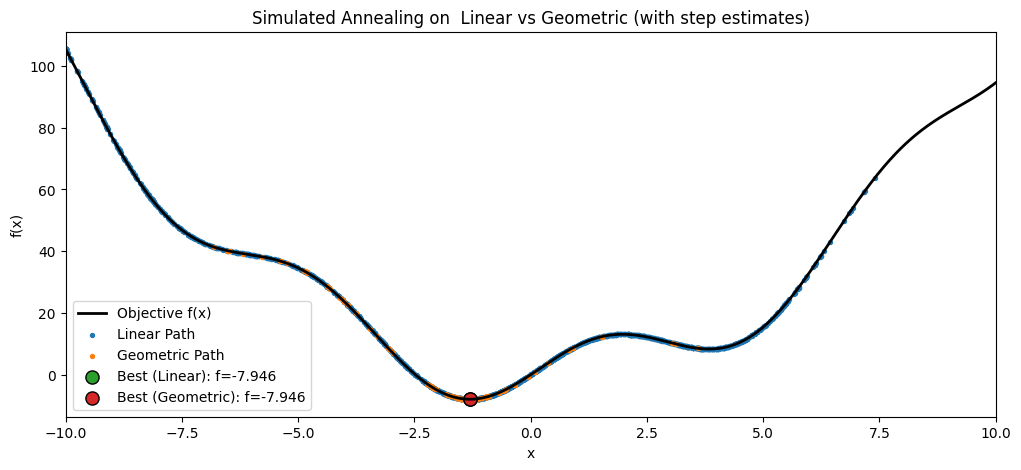

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

# -------- Problem setup (bounded to [-10, 10]) --------
LOW, HIGH = -10.0, 10.0

def f(x):
    return x**2 + 10 * np.sin(x)

def propose(x, step=1.0, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    x_new = x + rng.normal(0, step)
    return np.clip(x_new, LOW, HIGH)

# -------- Cooling step estimator --------
def estimate_steps(cooling, T0, T_min, alpha=None, beta=None):
    """
    Returns the number of steps the schedule implies until T <= T_min.
    (Ceiling to the next integer step.)
    """
    if cooling == 'geometric':
        if not (0 < alpha < 1):
            raise ValueError("For geometric cooling, alpha must be in (0,1).")
        if T_min <= 0 or T0 <= 0:
            raise ValueError("T0 and T_min must be > 0 for geometric schedule.")
        k = math.log(T_min / T0) / math.log(alpha)  # positive number of steps
        return int(math.ceil(k))
    elif cooling == 'linear':
        if beta is None or beta <= 0:
            raise ValueError("For linear cooling, beta must be > 0.")
        if T0 <= T_min:
            return 0
        k = (T0 - T_min) / beta
        return int(math.ceil(k))
    else:
        raise ValueError("cooling must be 'linear' or 'geometric'.")

# -------- Simulated Annealing core --------
def simulated_annealing(
    cooling='linear',
    T0=100.0,
    T_min=1e-3,
    steps_cap=3000,
    alpha=0.95,          # for geometric
    beta=0.05,           # for linear
    step_size=0.8,
    seed=None
):
    rng = np.random.default_rng(seed)
    x = rng.uniform(LOW, HIGH)
    best_x, best_cost = x, f(x)
    T = T0
    history = [x]
    accept_count = 0

    # Compute analytic estimate implied by the cooling schedule
    est_steps = estimate_steps(
        cooling=cooling, T0=T0, T_min=T_min, alpha=alpha, beta=beta
    )

    # Run until we either get cold enough or hit steps_cap
    actual_steps = 0
    while T > T_min and actual_steps < steps_cap:
        x_new = propose(x, step=step_size, rng=rng)
        delta = f(x_new) - f(x)

        # Metropolis acceptance
        if delta < 0 or np.exp(-delta / T) > rng.random():
            x = x_new
            accept_count += 1

        fx = f(x)
        if fx < best_cost:
            best_x, best_cost = x, fx

        history.append(x)
        actual_steps += 1

        # Cool
        if cooling == 'linear':
            T = max(T - beta, T_min)
        else:  # geometric
            T = max(alpha * T, T_min)

    return {
        "history": np.array(history),
        "best_x": best_x,
        "best_cost": best_cost,
        "estimated_steps": est_steps,
        "actual_steps": actual_steps,
        "accept_count": accept_count
    }

# -------- Run both schedules (bounded) --------
params_linear = dict(cooling='linear', T0=100, T_min=1e-3, steps_cap=3000, beta=0.05, step_size=0.8, seed=42)
params_geo    = dict(cooling='geometric', T0=100, T_min=1e-3, steps_cap=3000, alpha=0.95, step_size=0.8, seed=43)

res_lin = simulated_annealing(**params_linear)
res_geo = simulated_annealing(**params_geo)

print("=== Linear Cooling ===")
print(f"Estimated steps (from schedule): {res_lin['estimated_steps']}")
print(f"Actual steps taken:             {res_lin['actual_steps']}")
print(f"Accepted moves:                 {res_lin['accept_count']}")
print(f"Best Linear: x = {res_lin['best_x']:.4f}, f(x) = {res_lin['best_cost']:.6f}\n")

print("=== Geometric Cooling ===")
print(f"Estimated steps (from schedule): {res_geo['estimated_steps']}")
print(f"Actual steps taken:             {res_geo['actual_steps']}")
print(f"Accepted moves:                 {res_geo['accept_count']}")
print(f"Best Geometric: x = {res_geo['best_x']:.4f}, f(x) = {res_geo['best_cost']:.6f}")

# -------- Visualization --------
xs = np.linspace(LOW, HIGH, 600)
plt.figure(figsize=(12,5))
plt.plot(xs, f(xs), 'k', lw=2, label='Objective f(x)')
plt.scatter(res_lin["history"], [f(xi) for xi in res_lin["history"]], s=8, label='Linear Path')
plt.scatter(res_geo["history"], [f(xi) for xi in res_geo["history"]], s=8, label='Geometric Path')
plt.scatter(res_lin["best_x"], res_lin["best_cost"], s=90, edgecolors='black', label=f'Best (Linear): f={res_lin["best_cost"]:.3f}')
plt.scatter(res_geo["best_x"], res_geo["best_cost"], s=90, edgecolors='black', label=f'Best (Geometric): f={res_geo["best_cost"]:.3f}')
plt.xlim(LOW, HIGH)
plt.xlabel('x'); plt.ylabel('f(x)')
plt.title('Simulated Annealing on  Linear vs Geometric (with step estimates)')
plt.legend()
plt.show()
